# Calculating the Distances

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import docplex.mp.solution as Solucion

In [3]:
df = pd.read_excel("Working_data.xlsx")

### All the data points

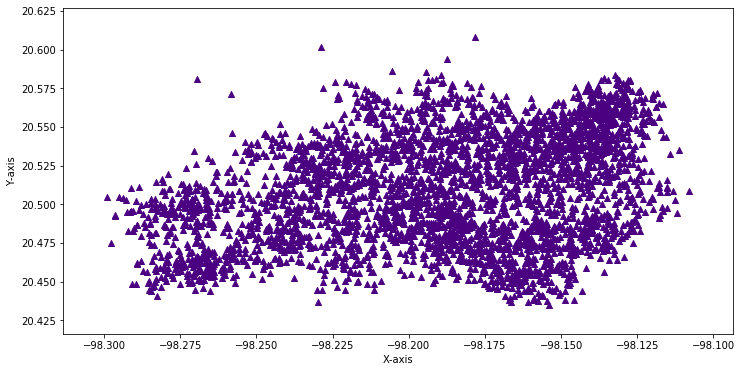

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(df["lon"], df['lat'], marker="^", color='indigo')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

### Now the Clusters

In [5]:
d1 = df[df["D1"]==1]
d2 = df[df["D2"]==1]
d3 = df[df["D3"]==1]
d4 = df[df["D4"]==1]
d5 = df[df["D5"]==1]
d6 = df[df["D6"]==1]

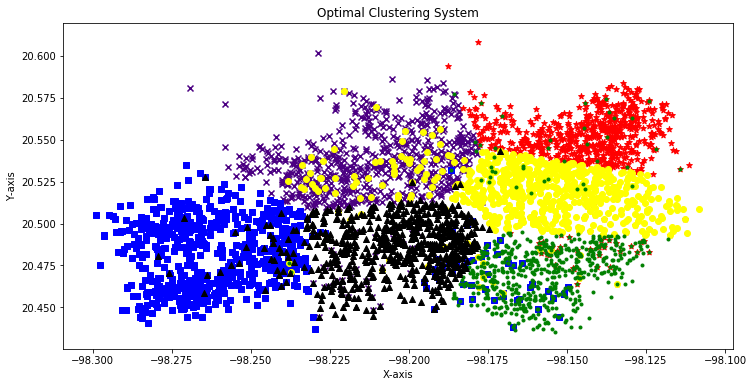

In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(d1["lon"], d1['lat'], marker="x", color='indigo')
plt.scatter(d2["lon"], d2['lat'], marker="*", color='red')
plt.scatter(d3["lon"], d3['lat'], marker="s", color='blue')
plt.scatter(d4["lon"], d4['lat'], marker="o", color='yellow')
plt.scatter(d5["lon"], d5['lat'], marker=".", color='green')
plt.scatter(d6["lon"], d6['lat'], marker="^", color='black')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Optimal Clustering System")
plt.show()

### Calculating the distances

In [12]:
# Just for D1
ciudades = [i for i in range(d1.shape[0])]
arcos = [(i,j) for i in ciudades for j in ciudades if i!=j]

In [13]:
coord_x = d1["lon"].tolist()
coord_y = d1["lat"].tolist()

In [14]:
# Finding the shortest path
# Distance Matrix
distancia = {(i,j):np.hypot(coord_x[i]-coord_x[j], coord_y[i]-coord_y[j]) for i,j in arcos}

In [ ]:
# Creating the model in Cplex
mdl = Model('TSP')
# Decision variables
x = mdl.binary_var_dict(arcos, name='x')
d = mdl.continuous_var_dict(ciudades, name='d')
# Objective Function
mdl.minimize(mdl.sum(distancia[i]*x[i] for i in arcos))
# Constraints
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i==c)==1, ctname='out_%d'%c)
    
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j==c)==1, ctname='in_%d'%c)
    
for i,j in arcos:
    if j!=0:
        mdl.add_indicator(x[(i,j)],d[i]+1==d[j], name='order_(%d,_%d)'%(i,j))

In [ ]:
solucion = mdl.solve(log_output=True)
mdl.get_solve_status()
solucion.display()

### The above solution might take a while, so for faster results:

**Creating a diferent distance matrix with the data we already obtained**

In [15]:
a = np.zeros((len(distancia),len(distancia)), float)
a.shape

(510510, 510510)

In [16]:
for i in range(d1.shape[0]):
    for j in range(d1.shape[0]):
        if i==j: continue
        a[i][j] = distancia[i,j]

In [17]:
from tsp_solver.greedy import solve_tsp

#### Now just get the distances from in a numpy array and sum them up

In [ ]:
path = solve_tsp(a)
np.sum(path)